<a href="https://colab.research.google.com/github/paulmachau/Dogecion-Historical-Prices/blob/main/Dogecoin_price_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
!pip install yfinance
import yfinance as yf


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


importing the necessary Libraries including yfinance

In [ ]:

# Define the ticker symbol for Dogecoin
ticker_symbol = 'DOGE-USD'

# Set the start and end dates for historical data
start_date = '2014-01-01'
end_date = '2024-01-01'

# Download historical data from Yahoo Finance
dogecoin_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Save the data to a CSV file
csv_filename = 'dogecoin_data.csv'
dogecoin_data.to_csv(csv_filename)

# Print the dynamically generated file name
print(csv_filename)


[*********************100%%**********************]  1 of 1 completed

dogecoin_data.csv


Downloading Dogecoin historical data between 2014 to 2024  dates. The data is then saved to a CSV file named 'dogecoin_data.csv'.

In [ ]:
#viewing the csv file
dogecoin_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [ ]:
# Get info about the dataset
dogecoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2244 entries, 2017-11-09 to 2023-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2244 non-null   float64
 1   High       2244 non-null   float64
 2   Low        2244 non-null   float64
 3   Close      2244 non-null   float64
 4   Adj Close  2244 non-null   float64
 5   Volume     2244 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 122.7 KB


The data consists of 2244 entries and 6 columns

In [ ]:
# Check unique values across the entire DataFrame
unique_values_overall = dogecoin_data.nunique()

# Print the unique values
print("Unique Values Overall:")
print(unique_values_overall)


Unique Values Overall:
Open         2013
High         2018
Low          2003
Close        2020
Adj Close    2020
Volume       2244
dtype: int64


In [ ]:
# Check for missing values
missing_values = dogecoin_data.isnull()

# Print out rows and columns with missing values
print("Rows and Columns with Missing Values:")
print(dogecoin_data[missing_values])


Rows and Columns with Missing Values:
            Open  High  Low  Close  Adj Close  Volume
Date                                                 
2017-11-09   NaN   NaN  NaN    NaN        NaN     NaN
2017-11-10   NaN   NaN  NaN    NaN        NaN     NaN
2017-11-11   NaN   NaN  NaN    NaN        NaN     NaN
2017-11-12   NaN   NaN  NaN    NaN        NaN     NaN
2017-11-13   NaN   NaN  NaN    NaN        NaN     NaN
...          ...   ...  ...    ...        ...     ...
2023-12-27   NaN   NaN  NaN    NaN        NaN     NaN
2023-12-28   NaN   NaN  NaN    NaN        NaN     NaN
2023-12-29   NaN   NaN  NaN    NaN        NaN     NaN
2023-12-30   NaN   NaN  NaN    NaN        NaN     NaN
2023-12-31   NaN   NaN  NaN    NaN        NaN     NaN

[2244 rows x 6 columns]


*Inferences*
There is on missing data on the 'dogecoin_data' data set


In [ ]:
# Display summary statistics for all columns
summary_statistics_all = dogecoin_data.describe(include='all')

# Print the summary statistics for all columns
print("Summary Statistics for All Columns:")
print(summary_statistics_all)


Summary Statistics for All Columns:
              Open         High          Low        Close    Adj Close  \
count  2244.000000  2244.000000  2244.000000  2244.000000  2244.000000   
mean      0.063036     0.066283     0.059919     0.063085     0.063085   
std       0.090186     0.097103     0.083486     0.090233     0.090233   
min       0.001046     0.001210     0.001002     0.001038     0.001038   
25%       0.002678     0.002751     0.002616     0.002680     0.002680   
50%       0.007405     0.008361     0.006858     0.007473     0.007473   
75%       0.081055     0.083612     0.079213     0.081125     0.081125   
max       0.687801     0.737567     0.608168     0.684777     0.684777   

             Volume  
count  2.244000e+03  
mean   9.250561e+08  
std    3.189198e+09  
min    1.431720e+06  
25%    3.882560e+07  
50%    1.732271e+08  
75%    6.373313e+08  
max    6.941068e+10  


*inferences*
The code above shows a summurry statistics for all the columns  indicating the Mean, Mode, Median and the percentiles

#EDA

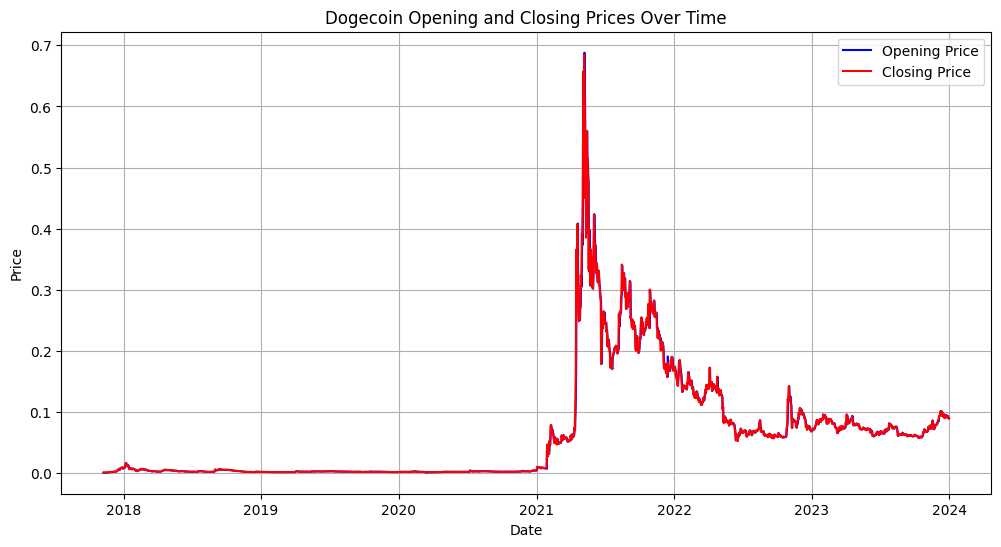

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(dogecoin_data['Date'], dogecoin_data['Open'], label='Opening Price', color='blue')
plt.plot(dogecoin_data['Date'], dogecoin_data['Close'], label='Closing Price', color='red')
plt.title('Dogecoin Opening and Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

*inferences*

The graph shows the distribution of the opening and closing prices over time, with red being the closing price and blue being the opening price

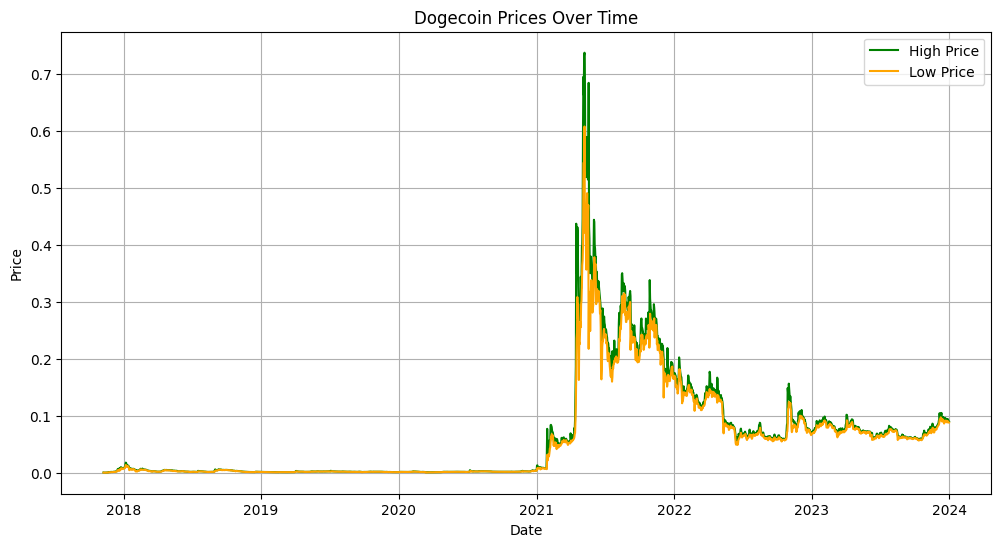

In [39]:
# Plot time series graph of Dogecoin opening, closing, high, and low prices
plt.figure(figsize=(12, 6))
plt.plot(dogecoin_data['Date'], dogecoin_data['High'], label='High Price', color='green')
plt.plot(dogecoin_data['Date'], dogecoin_data['Low'], label='Low Price', color='orange')
plt.title('Dogecoin Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

**inferences*

The graph shows the high and low prices over time in between 2021 and 2022 being the pick having the highest prices and then falling progressively after that to 2024

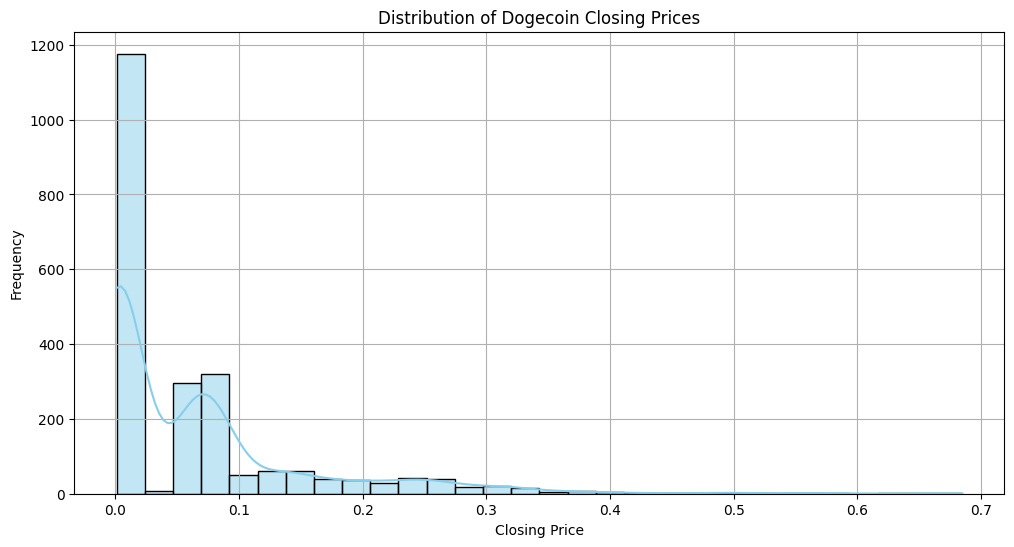

In [37]:

# Plot histogram of Dogecoin closing prices
plt.figure(figsize=(12, 6))
sns.histplot(dogecoin_data['Close'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Dogecoin Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
